## Imports Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
%matplotlib inline

## ImageFolder를 이용하여 Train Data Set 만들기

- root : dataset이 있는 위치
- transform : 이미지에 대한 형태를 변형할 때 사용, 여기서는 크기를 줄인다.

In [3]:
trans = transforms.Compose([
    transforms.Resize((64,128))
])

train_data = torchvision.datasets.ImageFolder(root='custom_data/origin_data', transform=trans)

## 모든 데이터들에 대해서 가공을 진행한다.

In [4]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if(label == 0):
        data.save('custom_data/train_data/gray/%d_%d.jpeg'%(num, label))   # 저장할 폴더를 새로 만들어주고 저장하기
    else:
        data.save('custom_data/train_data/red/%d_%d.jpeg'%(num, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x22593408D88> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABC88> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABBC8> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABCC8> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABD88> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE08> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE88> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABF08> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABF88> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934B9088> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934B90C8> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934B9148> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934B91C8> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934B9248> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934B92C8> 0
15 <P

130 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABEC8> 0
131 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABB48> 0
132 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABD88> 0
133 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE08> 0
134 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABF88> 0
135 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABC48> 0
136 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABFC8> 0
137 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABBC8> 0
138 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934AB788> 0
139 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE908> 0
140 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE1C8> 0
141 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE148> 0
142 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE0C8> 0
143 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE108> 0
144 <PIL.Image.Image image mode=RGB size=128x64 

264 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934AB708> 0
265 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABC48> 0
266 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABF88> 0
267 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABDC8> 0
268 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABFC8> 0
269 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE08> 0
270 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABC08> 0
271 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934AB788> 0
272 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABD08> 0
273 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE908> 0
274 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE1C8> 0
275 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE188> 0
276 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE208> 0
277 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE288> 0
278 <PIL.Image.Image image mode=RGB size=128x64 

394 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934AB748> 1
395 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE08> 1
396 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABFC8> 1
397 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABF48> 1
398 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABC08> 1
399 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABDC8> 1
400 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABB88> 1
401 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABD08> 1
402 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE88> 1
403 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE288> 1
404 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE308> 1
405 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE388> 1
406 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE408> 1
407 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE488> 1
408 <PIL.Image.Image image mode=RGB size=128x64 

530 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE08> 1
531 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABF08> 1
532 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABC08> 1
533 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABDC8> 1
534 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABE88> 1
535 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934AB708> 1
536 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABD88> 1
537 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABD48> 1
538 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934ABEC8> 1
539 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE488> 1
540 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE508> 1
541 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE588> 1
542 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE608> 1
543 <PIL.Image.Image image mode=RGB size=128x64 at 0x225934BE688> 1
544 <PIL.Image.Image image mode=RGB size=128x64 

### 이미지가 잘 저장 되었는지 확인

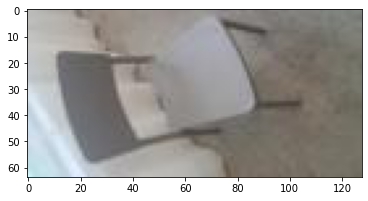

In [5]:
img = imread('./custom_data/train_data/gray/0_0.jpeg')  # 지금 폴더 위치에서 사진 파일까지 경로를 찾아서 들어감
plt.imshow(img)
plt.show()

## Tensor로 다시 바꾸어주기

In [6]:
trans = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root='./custom_data/train_data', transform=trans)

In [7]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='./custom_data/test_data', transform=trans)

## DataLoader를 통해 Train 및 Test가 가능하도록 하기
### torch.utils.data.DataLoader 의 Parameter
- dataset : 어떤 데이터셋을 읽어올 것인지?
- batch_size : batch_size를 몇으로 할 것인지?
- shuffle : dataset을 섞을 것인지?
- num_workers :  데이터 로드 멀티 프로세싱 (코어 개수의 절반정도 수치면 무난하게 시스템 리소스를 사용하며 학습이 가능)

In [8]:
train_set = DataLoader(dataset = train_data, batch_size = 8, shuffle = True, num_workers=2)

In [9]:
test_set = DataLoader(dataset = test_data, batch_size = 8)

## GPU 사용 여부 및 Random Seed 확인

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

cuda


## CNN 구조 설계하기

<p align="center"><img src="NeuralNetwork.JPG" width = "500" ></p>

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):   #print(out.shape)을 이용해서 shape확인 후 지워주기!
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.layer3(out)
        return out
        

In [12]:
#testing 
net = CNN().to(device)
test_input = (torch.Tensor(3,3,64,128)).to(device)
test_out = net(test_input)

In [13]:
# Optimizer 설정
optimizer = optim.Adam(net.parameters(), lr=0.00005)

# Loss function 설정
loss_func = nn.CrossEntropyLoss().to(device)

## Training

In [14]:
total_batch = len(train_set)

epochs = 20
for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(train_set):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        out = net(imgs)  # 정답값 예측
        
        loss = loss_func(out, labels)  # Loss 계산
        
        optimizer.zero_grad()  # 기울기 초기화
        loss.backward()        # 기울기값 계산
        optimizer.step()       # Weight update
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!')   

[Epoch:1] cost = 0.6340197324752808
[Epoch:2] cost = 0.3754199743270874
[Epoch:3] cost = 0.1126946434378624
[Epoch:4] cost = 0.035628847777843475
[Epoch:5] cost = 0.016450798138976097
[Epoch:6] cost = 0.009241671301424503
[Epoch:7] cost = 0.0057147289626300335
[Epoch:8] cost = 0.004139262717217207
[Epoch:9] cost = 0.002953845076262951
[Epoch:10] cost = 0.002309210132807493
[Epoch:11] cost = 0.001752698328346014
[Epoch:12] cost = 0.0014729800168424845
[Epoch:13] cost = 0.0012038348941132426
[Epoch:14] cost = 0.0009606312960386276
[Epoch:15] cost = 0.0008325519156642258
[Epoch:16] cost = 0.0006995717412792146
[Epoch:17] cost = 0.0005987549666315317
[Epoch:18] cost = 0.0005281010526232421
[Epoch:19] cost = 0.0004607378214132041
[Epoch:20] cost = 0.00042641081381589174
Learning Finished!


## 모델 저장하기

In [15]:
torch.save(net.state_dict(), "./model.pth")

## 모델 Load하기

In [16]:
#동일한 네트워크 모형 만들기
new_net = CNN().to(device)
# load_state_dict를 이용해서 불러오기
new_net.load_state_dict(torch.load("./model.pth"))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [17]:
# 동일한 값을 가지고 있는지 확인
print(net.layer1[0])                 # 첫번째 layer에 해당하는 값
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0]) #첫번째 layer에 3번째 weight값에 해당하는 값
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([-0.0898,  0.0049, -0.0153, -0.0193,  0.0950], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([-0.0898,  0.0049, -0.0153, -0.0193,  0.0950], device='cuda:0',
       grad_fn=<SelectBackward>)


tensor([[[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]], device='cuda:0', dtype=torch.uint8)

## Test 

In [18]:
torch.cuda.empty_cache()

In [19]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
